## Build a basic chatbot



---

# 🧠 Build Your First Chatbot with LangGraph

Welcome to your first step in creating a chatbot using **LangGraph**! 🌟
This is not just any chatbot — it's built with **stateful logic** using graphs. As you go through this tutorial, you'll understand key concepts like state management, nodes, and transitions.

---

## 🔧 Prerequisites

Before diving in, make sure you have access to a language model that supports **tool calling**, such as:

* **OpenAI GPT-4**
* **Anthropic Claude**
* **Google Gemini**
* **Azure/OpenAI**
* **AWS Bedrock**

We'll be using `LangGraph`, a cool library built on top of `LangChain`.

---

## ✅ Step 1: Install Required Packages

Open your terminal and run:

```bash
pip install -U langgraph langsmith
```

> 💡 **Tip**: Create a free [LangSmith](https://smith.langchain.com) account to monitor and debug your chatbot more easily. Super handy!

---

## 🧠 Step 2: Define Your State (a.k.a. Memory)

We need to define what data our chatbot will hold and update. We do that using a **state**.

```python
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]
```

### 🔍 What's happening here?

* We're defining a state with a `messages` list.
* The `add_messages` part means: "append new messages instead of overwriting."

```python
graph_builder = StateGraph(State)
```

This creates a graph builder that will hold all our chatbot logic.

---

## 🧩 Step 3: Add a Chatbot Node

A **node** is just a Python function that does some work.

Let's first set up our LLM (e.g., Google Gemini):

```python
from langchain.chat_models import init_chat_model
import os

os.environ["GOOGLE_API_KEY"] = "your_api_key_here"
llm = init_chat_model("google_genai:gemini-2.0-flash")
```

Now, define the chatbot function and add it as a node:

```python
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)
```

📌 **Key point:** This node receives `state`, uses the LLM to generate a reply, and appends it to the `messages` list.

---

## 🚪 Step 4: Add an Entry Point

Tell the graph where to start — in this case, it should start at the `"chatbot"` node.

```python
graph_builder.add_edge(START, "chatbot")
```

---

## 🧪 Step 5: Compile the Graph

Before we run it, we need to compile the graph into a runnable object:

```python
graph = graph_builder.compile()
```

---

## 🎨 (Optional) Step 6: Visualize the Graph

You can visualize your graph using the `draw` methods.

```python
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except:
    pass  # This needs extra dependencies
```

---

## 💬 Step 7: Run the Chatbot

Here’s how to create a simple loop to interact with the bot:

```python
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        user_input = "What do you know about LangGraph?"
        print("User:", user_input)
        stream_graph_updates(user_input)
        break
```

---

## 🧠 What You Just Built

✅ A **stateful chatbot** that can:

* Accept user input
* Store the conversation
* Use a Language Model to reply
* Keep the conversation going in a loop

---

## 🧵 Full Code Summary

```python
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages
from langchain.chat_models import init_chat_model
import os

# Define state
class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

# Setup LLM
os.environ["GOOGLE_API_KEY"] = "your_api_key_here"
llm = init_chat_model("google_genai:gemini-2.0-flash")

# Node function
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

# Build graph
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph = graph_builder.compile()

# Run chatbot
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        user_input = "What do you know about LangGraph?"
        print("User:", user_input)
        stream_graph_updates(user_input)
        break
```

---

## 🎉 Congrats!

You’ve now built a fully functioning chatbot using **LangGraph**.
Next up: you’ll add **tools**, **memory**, **multi-agent support**, and more. 🧩🤖

Let me know when you're ready for the next step!

---


In [26]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


Our graph can now handle two key tasks:

1. Each node can receive the current State as input and output an update to the state.
2. Updates to messages will be appended to the existing list rather than overwriting it, thanks to the prebuilt add_messages function used with the Annotated syntax.

### Add a node¶ Next, add a "chatbot" node. Nodes represent units of work and are typically regular Python functions.

In [ ]:
import os
from langchain.chat_models import init_chat_model

os.environ["GOOGLE_API_KEY"] = "api"

llm = init_chat_model("google_genai:gemini-2.0-flash")

In [28]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [29]:
graph_builder.add_edge(START, "chatbot")

In [30]:
graph = graph_builder.compile()

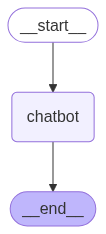

In [31]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [32]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

g:\Projects\LangGraph\env\Lib\site-packages\langchain_google_genai\chat_models.py:1568: UserWarning: HumanMessage with empty content was removed to prevent API error
  warnings.warn(


User: What do you know about LangGraph?
Assistant: LangGraph is a Python library built on top of LangChain that provides a way to create **stateful, multi-actor conversational applications**. Think of it as a framework for building complex, intelligent assistants and agents that can interact with users, tools, and other agents in a more structured and reliable way than simple sequential LangChain chains.

Here's a breakdown of what I know about LangGraph:

**Key Concepts:**

* **State Graph:** The central concept is the "state graph," which represents the flow of your application. Nodes in the graph represent different states or actions, and edges define the transitions between them.  The state is persisted throughout the conversation, allowing the agent to "remember" past interactions and use that information to inform future decisions.
* **Nodes:** Nodes can represent anything from calling a LangChain chain to executing a Python function to making a decision based on the current stat